
Declan Barry 

Application of the Crank-Nicolson Scheme to European Put and Call Options

In [3]:
import numpy as num;

import math;
import scipy.linalg as linalg;

import matplotlib.pyplot as plt;
from mpl_toolkits.mplot3d import axes3d;

%matplotlib notebook 

# Define parameters 

# Option parameters
E = 7;                # Strike price
T = 0.9;                 # Expiration time
r = 0.01;               # Risk free rate
sigma = 0.5;            # Volatility
sLow = math.exp(-8);    # Minimum value of S (Stock Price) (very close to boundary condition at S=0)
sHigh = math.exp(8);    # Maximum value of S (very large, since second boundary 
                        # condition for V(S,t) is defined as S increases to infinity.)

# Transformed parameters
xLow = math.log(sLow/E);        # Transformed minimum state value
xHigh = math.log(sHigh/E);      # Transformed maximum state value
Tau = 0.5*(sigma**2)*(T);       # Transformed length of time interval
k = r/(0.5*sigma**2);
alphaT = -0.5*(k-1);
betaT = -0.25*(k+1)**2;

# Discretisation parameters
Nx = 500; dx = (xHigh-xLow)/float(Nx);
Nt = 500; dt = Tau/float(Nt); 
alpha = dt/(float(dx)**2);                
x=num.linspace(xLow,xHigh,Nx+1);
tau = num.linspace(0,Tau,Nt+1);
S = E*num.exp(x);
t = T-(2/sigma**2)*tau;

<IPython.core.display.Javascript object>


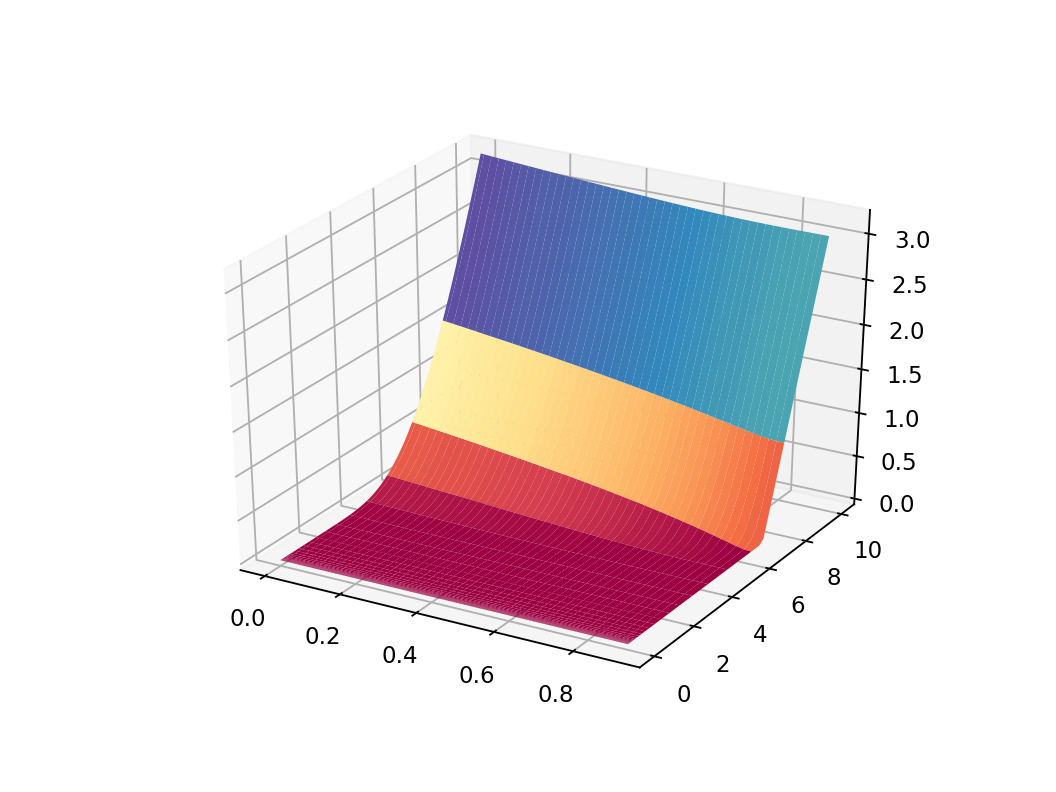

In [4]:
Bhat = (1+alpha)*num.eye(Nx-1,Nx-1) - 0.5*alpha*num.diag(num.ones(Nx-2),1) - 0.5*alpha*num.diag(num.ones(Nx-2),-1);
Bhatinv=linalg.inv(Bhat);
Fhat = (1-alpha)*num.eye(Nx-1,Nx-1) + 0.5*alpha*num.diag(num.ones(Nx-2),1) + 0.5*alpha*num.diag(num.ones(Nx-2),-1);

# Set up matrix containing the interior solution values U(n*dx, m*dt)
U = num.zeros((Nx-1,Nt+1));

# Define the initial profile and boundary conditions

# European call 
U[:,0] = num.maximum(num.exp(0.5*(k+1)*num.linspace(xLow+dx,xHigh-dx,Nx-1))-num.exp(0.5*(k-1)*num.linspace(xLow+dx,xHigh-dx,Nx-1)),0);
a = 0*num.ones(Nt+1);
b = num.exp((1-alphaT)*xHigh-betaT*tau);

# Set up the collection of vectors q containing the boundary conditions
# and populate the first and last row.  
q=num.zeros((Nx-1,Nt+1));
q[0,:]=alpha*a; 
q[Nx-2,:]=alpha*b;

# Compute the interior solution values via the BTCS scheme.
for i in range(0,Nt):
    U[:,i+1] = Bhatinv.dot(U[:,i])+Bhatinv.dot(q[:,i]);

# Append the boundary conditions to the solution matrix.
U=num.r_[[a],U,[b]]

# Transform back to the Black-Scholes variables. 
V = num.zeros((Nx+1,Nt+1));

for i in range(0,Nx+1):
  for j in range(0,Nt+1):
    V[i,j]=E*num.exp(alphaT*x[i]+betaT*tau[j])*U[i,j];
 

# Zoomed solution of the Black-Scholes equation for asset values on [0,100]

fig = plt.figure()
ax = plt.axes(projection='3d')

xr=math.ceil((math.log(10/E)-xLow)/float(dx));

X,Y=num.meshgrid(num.linspace(T,0,Nt+1),E*num.exp(num.linspace(xLow,xr*dx+xLow,xr+1)))

ax.plot_surface(X,Y,V[range(0,xr+1),:],cmap='Spectral');
plt.show();





<IPython.core.display.Javascript object>


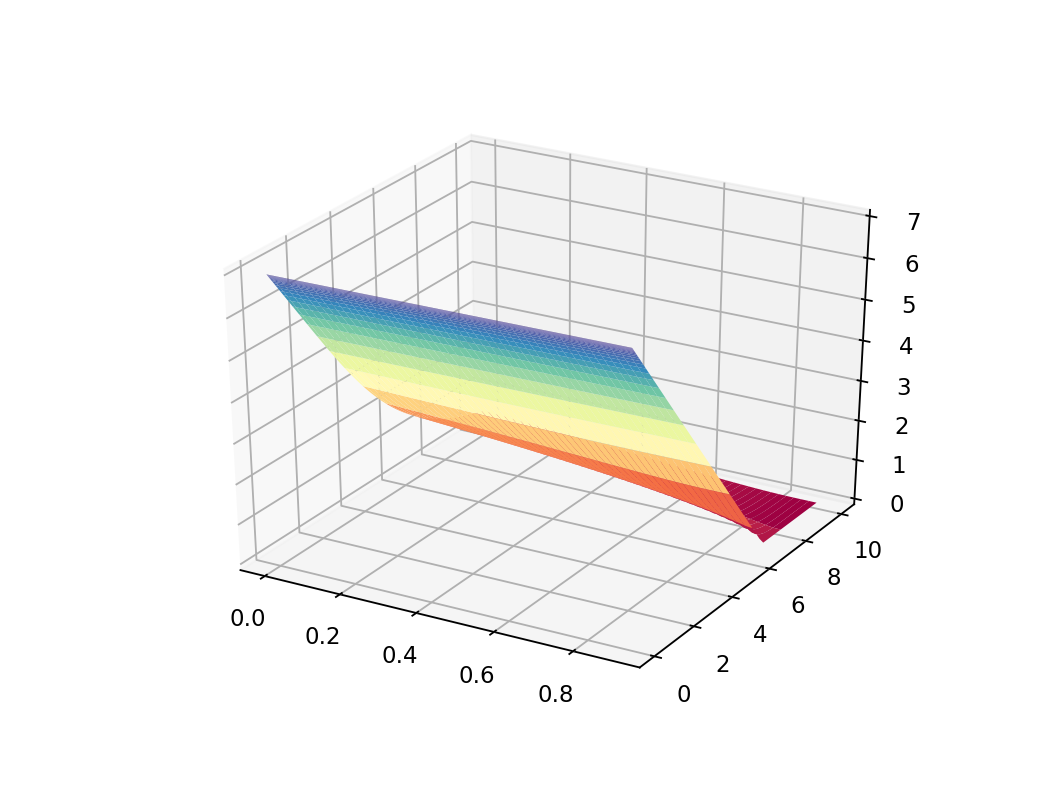

In [5]:
Bhat = (1+alpha)*num.eye(Nx-1,Nx-1) - 0.5*alpha*num.diag(num.ones(Nx-2),1) - 0.5*alpha*num.diag(num.ones(Nx-2),-1);
Bhatinv=linalg.inv(Bhat);
Fhat = (1-alpha)*num.eye(Nx-1,Nx-1) + 0.5*alpha*num.diag(num.ones(Nx-2),1) + 0.5*alpha*num.diag(num.ones(Nx-2),-1);

#Set up matrix containing the interior solution values U(n*dx, m*dt)
U = num.zeros((Nx-1,Nt+1));

#Define the initial profile and boundary conditions

# European put 
U[:,0] = num.maximum(num.exp(0.5*(k-1)*num.linspace(xLow+dx,xHigh-dx,Nx-1))-num.exp(0.5*(k+1)*num.linspace(xLow+dx,xHigh-dx,Nx-1)),0);
a = num.exp(-alphaT*xLow-(betaT+k)*tau);
b = 0*num.ones(Nt+1);

#Set up the collection of vectors q containing the boundary conditions
# and populate the first and last row.  
q=num.zeros((Nx-1,Nt+1));
q[0,:]=alpha*a; 
q[Nx-2,:]=alpha*b;

#Compute the interior solution values via the BTCS scheme.

for i in range(0,Nt):
    U[:,i+1] = Bhatinv.dot(Fhat.dot(U[:,i]))+Bhatinv.dot(q[:,i]);
    
    
#Append the boundary conditions to the solution matrix.
U=num.r_[[a],U,[b]]

#Transform back to the Black-Scholes variables. 
V = num.zeros((Nx+1,Nt+1));

for i in range(0,Nx+1):
  for j in range(0,Nt+1):
    V[i,j]=E*num.exp(alphaT*x[i]+betaT*tau[j])*U[i,j];
 

# Zoomed solution of the Black-Scholes equation for asset values on [0,100]

fig = plt.figure()
ax = plt.axes(projection='3d')

xr=math.ceil((math.log(10/E)-xLow)/float(dx));

X,Y=num.meshgrid(num.linspace(T,0,Nt+1),E*num.exp(num.linspace(xLow,xr*dx+xLow,xr+1)))

ax.plot_surface(X,Y,V[range(0,xr+1),:],cmap='Spectral');
plt.show();



